## CMS Medicare Part D Prescriber Summary Table 
### Initial Exploratory Data Analysis
* Contains summary drug utilization, cost, and beneficiary information for Medicare Part D Prescibers for the calendar years 2013 - 2017

In [2]:
# Import Pyhon libraries
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import statistics

DATA_FOLDER = r"Datasets/Summary_Tables/"
os.chdir(DATA_FOLDER)
os.getcwd()

'C:\\Users\\theru\\DATA606\\Datasets\\Summary_Tables'

In [3]:
# Display file names
data_files = os.listdir()
data_files

['Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2013.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2014.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2015.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2016.csv',
 'Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2017.csv']

### Load Summary Table Files into Dataframe for Analysis

In [4]:
# Loop through files, extract year from filename, and load into dataframe
df_list = []

for file in data_files:
    df_tmp = pd.read_csv(file)
    df_tmp['year'] = file[82:86]   # find year based on filename
    df_list.append(df_tmp)   

dfSummaryTables = pd.concat(df_list)   # build combined dataset for all years
dfSummaryTables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 85 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   npi                               int64  
 1   nppes_provider_last_org_name      object 
 2   nppes_provider_first_name         object 
 3   nppes_provider_mi                 object 
 4   nppes_credentials                 object 
 5   nppes_provider_gender             object 
 6   nppes_entity_code                 object 
 7   nppes_provider_street1            object 
 8   nppes_provider_street2            object 
 9   nppes_provider_city               object 
 10  nppes_provider_zip5               float64
 11  nppes_provider_zip4               float64
 12  nppes_provider_state              object 
 13  nppes_provider_country            object 
 14  specialty_description             object 
 15  description_flag                  object 
 16  medicare_prvdr_enroll_status      ob

In [5]:
# Display random sample of records for review
dfSummaryTables.sample(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,year
507659,1437361391,MCWILLIAMS,MICHAEL,J,MD,M,I,1202 MEDICAL CENTER DR,NaN,WILMINGTON,...,368.0,48.0,NaN,NaN,0.0,NaN,407.0,32.0,0.9982,2017
154514,1144455114,SCHNEIDER,ZACHARY,J,MD,M,I,8787 BRYAN DAIRY ROAD,SUITE 320,LARGO,...,287.0,NaN,0.0,NaN,0.0,NaN,265.0,36.0,1.2209,2013
78263,1063843670,NEPOMUCENO,JENIE,NaN,MD,F,I,4309 W MEDICAL CENTER DR STE A102,NaN,MCHENRY,...,25.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.7419,2016
126771,1114115078,GONZALEZ,SYLVIA,NaN,M.D.,F,I,6560 FANNIN ST STE 1878,NaN,HOUSTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
508785,1437435880,WILSON,JULENE,M,CRNP,F,I,3509 N BROAD ST,NaN,PHILADELPHIA,...,11.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,3.9721,2017
542631,1518914340,THACKREY,BRUCE,W,DMD,M,I,1704 JEFFERSON AVE,NaN,MOUNT VERNON,...,35.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.2870,2013
772983,1669540472,ROOSEN,NORBERT,NaN,M.D.,M,I,HENRY FORD HEALTH SYSTEM,2799 WEST GRAND BOULEVARD,DETROIT,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,1.7412,2017
909719,1801270129,LEVAN,JESSICA,NaN,ARNP,F,I,4830 W KENNEDY BLVD,SUITE 101,TAMPA,...,NaN,0.0,0.0,NaN,0.0,0.0,20.0,0.0,0.8041,2016
551952,1477627602,HERNANDEZ,MARK,A,MD,M,I,2387 W 68TH ST,SUITE 303,HIALEAH,...,40.0,17.0,NaN,133.0,0.0,NaN,44.0,157.0,2.0222,2017
866275,1740382506,NEGIN,HARLEY,NaN,M.D.,M,I,625 LINCOLN AVE,NaN,SAN JOSE,...,115.0,NaN,14.0,63.0,NaN,NaN,161.0,46.0,1.2952,2017


### Display General Statistics for Several Key Features

In [6]:
dfSummaryTables[[
    'bene_count',
    'total_claim_count',
    'opioid_claim_count',
    'opioid_bene_count', 
    'la_opioid_claim_count',
    'la_opioid_bene_count', 
]
].describe(include='all')

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
count,4.840546e+06,5.518978e+06,3.919623e+06,3.614306e+06,4.723516e+06,4.367906e+06
mean,1.519888e+02,1.305351e+03,9.931664e+01,3.228957e+01,1.032138e+01,1.767997e+00
std,1.957043e+02,3.142083e+03,3.093827e+02,5.636551e+01,7.161349e+01,1.370086e+01
min,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.300000e+01,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.300000e+01,1.950000e+02,2.000000e+01,1.600000e+01,0.000000e+00,0.000000e+00
75%,2.020000e+02,9.860000e+02,7.400000e+01,4.200000e+01,0.000000e+00,0.000000e+00
max,3.996500e+04,4.472880e+05,2.642100e+04,3.633000e+03,8.444000e+03,1.310000e+03


In [7]:
dfSummaryTables['nppes_provider_state'].unique()

array(['MD', 'OH', 'NV', 'CA', 'WA', 'TN', 'PA', 'GA', 'CO', 'FL', 'TX',
       'OR', 'KY', 'SC', 'CT', 'NY', 'NJ', 'NC', 'MI', 'VA', 'AR', 'MA',
       'MS', 'IA', 'NH', 'MN', 'NE', 'IL', 'DC', 'OK', 'LA', 'ND', 'IN',
       'AZ', 'AL', 'PR', 'UT', 'HI', 'MO', 'KS', 'WI', 'RI', 'ID', 'NM',
       'WV', 'VT', 'ME', 'AE', 'MT', 'DE', 'WY', 'SD', 'AK', 'VI', 'GU',
       'ZZ', 'MP', 'AP', 'AA', 'AS', 'XX'], dtype=object)

### Overall Provider Characteristics (Not Opioid Specific)

In [8]:
# Create Provider-Registration Based Dataframe
df_provider_details = dfSummaryTables[[
    'npi',
    'nppes_provider_last_org_name',
    'nppes_provider_first_name',
    'nppes_provider_city',
    'nppes_provider_state',
    'nppes_provider_zip5',
    'nppes_provider_zip4',
    'specialty_description'
]]

df_provider_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           int64  
 1   nppes_provider_last_org_name  object 
 2   nppes_provider_first_name     object 
 3   nppes_provider_city           object 
 4   nppes_provider_state          object 
 5   nppes_provider_zip5           float64
 6   nppes_provider_zip4           float64
 7   specialty_description         object 
dtypes: float64(2), int64(1), object(5)
memory usage: 379.0+ MB


In [9]:
# Remove duplicates based on NPI since Summary Table spans 5 years
df_provider_details = df_provider_details.drop_duplicates(subset='npi')
df_provider_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404428 entries, 0 to 1162864
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   npi                           1404428 non-null  int64  
 1   nppes_provider_last_org_name  1404384 non-null  object 
 2   nppes_provider_first_name     1397620 non-null  object 
 3   nppes_provider_city           1404427 non-null  object 
 4   nppes_provider_state          1404428 non-null  object 
 5   nppes_provider_zip5           1404309 non-null  float64
 6   nppes_provider_zip4           1247130 non-null  float64
 7   specialty_description         1404428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 96.4+ MB


In [10]:
df_provider_details.sample(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
906775,1861497240,RAHMAN,SHEIKH,LAWRENCEBURG,IN,47025.0,2787.0,Family Practice
547213,1528020476,PARSONS,LISA,ATHENS,TN,37303.0,3494.0,Podiatry
178460,1164865960,ROSEN,CHAD,ROCHESTER,MI,48307.0,1863.0,Student in an Organized Health Care Education/...
586852,1558612366,SUGHROUE,AMIE,NORTH PLATTE,NE,69101.0,6525.0,Physician Assistant
686917,1639518897,AHMED,ALI,SAGINAW,MI,48602.0,5303.0,Emergency Medicine
557700,1538120233,TRIVEDI,KANHAIYALAL,ANDALUSIA,AL,36420.0,3128.0,Neurology
327735,1316059769,ERICKSON,DANIEL,RICE LAKE,WI,54868.0,5000.0,Family Practice
663482,1568997369,REYES,MARISA,CHICAGO,IL,60638.0,2531.0,Nurse Practitioner
354386,1336315266,BROOKS,JOHN,MOUNT AIRY,MD,21771.0,5317.0,Dentist
1009812,1962461996,HSU,YAO-KING,BALTIMORE,MD,21218.0,3322.0,Obstetrics/Gynecology


In [11]:
# Determine provider count per state
df_provider_overview =  df_provider_details[[
    'nppes_provider_state',  
    'npi'    
]].groupby(['nppes_provider_state']).count().reset_index()

df_provider_overview.sample(10) 

,nppes_provider_state,npi
33,NC,41838
36,NH,6905
8,CA,143640
1,AE,137
25,MD,28787
58,WY,2141
9,CO,22797
21,KS,11770
22,KY,18896
40,NY,120195


In [12]:
# Create dataframe for top ten states based on number of providers
df_provider_overview.sort_values(['npi'], ascending=True, inplace=True)   # sort by number of npi
df_top10_state = df_provider_overview.tail(10).copy()

col_names = {
    "npi": "provider_count"   # rename npi as provider_count
}

df_top10_state.rename(columns = col_names, inplace= True)

df_top10_state   # display top 10 by number of providers

,nppes_provider_state,provider_count
33,NC,41838
24,MA,44512
27,MI,51715
41,OH,56111
19,IL,57842
44,PA,70590
13,FL,82214
50,TX,88174
40,NY,120195
8,CA,143640


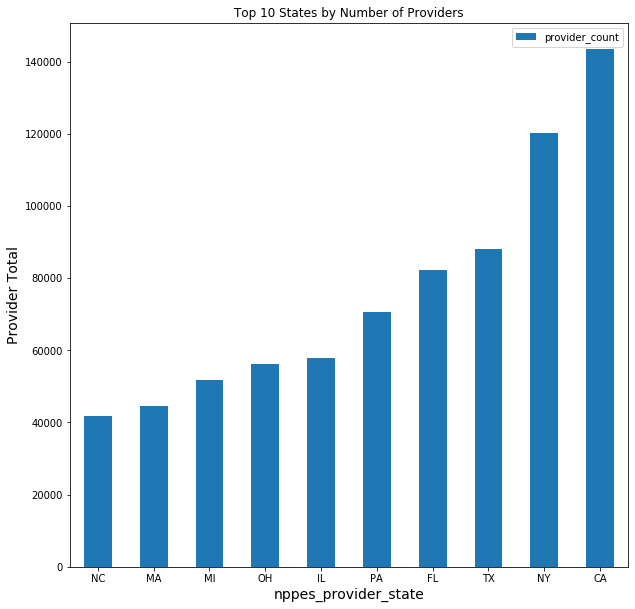

In [13]:
# Chart Top 10 States by Number of Providers
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Top 10 States by Number of Providers")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Provider Total', fontsize=14)
df_top10_state.plot.bar(x='nppes_provider_state', y='provider_count',rot=0, ax=ax)

#### FINDINGS OF NOTE
* California has largest number of providers; not unexpected due to its population
* Florida ranks #4 despite overall large number of Medicare Recipients, quite far back from NY and CA

In [14]:
# Determine provider count per specialty
df_provider_type =  df_provider_details[[
    'specialty_description',  
    'npi'    
]].groupby(['specialty_description']).count().reset_index()

df_provider_type.sample(10)

,specialty_description,npi
231,Registered Dietician/Nutrition Professional,150
96,Hand Surgery,1261
94,Gynecological Oncology,10
16,Assisted Living Facility,2
63,Dental Laboratory Technician,1
219,Psychologist,451
146,Military Hospital,18
263,Substance Abuse Rehabilitation Facility,13
215,Psychiatric Residential Treatment Facility,4
193,Personal Emergency Response Attendant,170


In [15]:
# Create dataframe for top ten provider specialty types
df_provider_type.sort_values(['npi'], ascending=True, inplace=True)
df_top10_specialty = df_provider_type.tail(10).copy()

col_names = {
    "npi": "specialty_count"
}

df_top10_specialty.rename(columns = col_names, inplace= True)
df_top10_specialty

,specialty_description,specialty_count
90,General Surgery,28677
173,Optometry,35524
167,Obstetrics/Gynecology,40011
80,Emergency Medicine,48943
203,Physician Assistant,104851
85,Family Practice,115966
262,Student in an Organized Health Care Education/...,118911
117,Internal Medicine,149648
65,Dentist,159738
160,Nurse Practitioner,178337


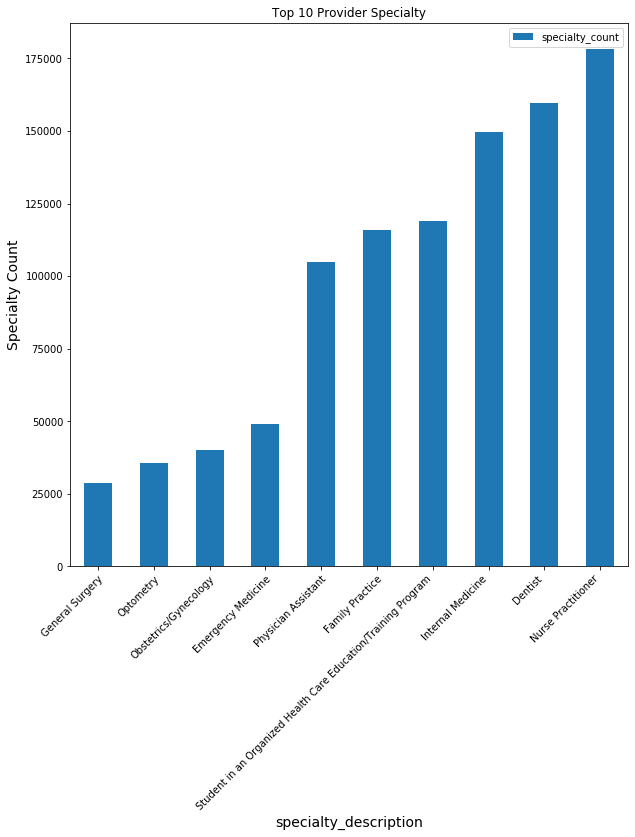

In [16]:
# Chart Top 10 Provider Specialties
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Top 10 Provider Specialty")
ax.set_xlabel('Specialty Description', fontsize=14)
ax.set_ylabel('Specialty Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
df_top10_specialty.plot.bar(x='specialty_description', y='specialty_count', rot=45, ax=ax)

#### FINDINGS OF NOTE
* Nurse Practitioner as top presciber seems logical
* Top 6 specialties seem reasonable, but surprised students are authorized to directly prescribe medications
* The drop-off from Physician Assistant to Emergency Medicine is quite large and surprising

### Opioid Specific Provider Characteristics

In [17]:
# Determine total by state for all beneficiaries and those prescibed opioids
df_opioid_by_state = dfSummaryTables[[
    'nppes_provider_state',
    'bene_count', 
    'opioid_bene_count'
]].groupby(['nppes_provider_state']).sum().reset_index()

df_opioid_by_state.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count
30,MP,5358.0,520.0
45,PR,10186469.0,1006829.0
25,MD,10397293.0,1584516.0
15,GU,39994.0,4278.0
42,OK,7921666.0,1633543.0
58,WY,868542.0,144880.0
26,ME,3754928.0,578331.0
2,AK,622364.0,111892.0
47,SC,12002753.0,2323783.0
46,RI,2896657.0,349070.0


In [18]:
# Remove records without opioid-related beneficiaries
df_opioid_by_state = df_opioid_by_state[(df_opioid_by_state.opioid_bene_count != 0)].copy() 
df_opioid_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nppes_provider_state  61 non-null     object 
 1   bene_count            61 non-null     float64
 2   opioid_bene_count     61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [19]:
df_opioid_by_state.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count
57,WV,5362683.0,891177.0
31,MS,7572240.0,1590633.0
35,NE,4121997.0,638247.0
10,CT,9291028.0,1054874.0
55,WA,13262909.0,2315226.0
30,MP,5358.0,520.0
46,RI,2896657.0,349070.0
25,MD,10397293.0,1584516.0
27,MI,26324936.0,4838390.0
52,VA,15691276.0,2596648.0


In [20]:
# Determine ratio of opioid beneficiaries to total beneficiaries
df_state_bene_ratio = pd.DataFrame()
df_state_bene_ratio = df_opioid_by_state[['nppes_provider_state', 'bene_count', 'opioid_bene_count']].copy()

df_state_bene_ratio['opioid_bene_ratio'] = (
    df_opioid_by_state['opioid_bene_count'] / df_opioid_by_state['bene_count']   # Opioid Benes / Total Benes
)

df_state_bene_ratio.sample(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
17,IA,7369519.0,1092027.0,0.148182
7,AZ,15597315.0,2695282.0,0.172804
14,GA,21397843.0,4095485.0,0.191397
38,NM,4255014.0,659927.0,0.155094
8,CA,73129821.0,11021617.0,0.150713
59,XX,5647.0,1067.0,0.188950
54,VT,1374983.0,175127.0,0.127367
30,MP,5358.0,520.0,0.097051
13,FL,58105201.0,8345389.0,0.143626
41,OH,30439459.0,4912336.0,0.161381


In [21]:
# Remove territories, military bases and unknown/unidentified states
excluded_state = ['XX', 'AA', 'AE', 'AP', 'AS', 'GU', 'MP', 'VI', 'ZZ']
df_filtered_state = df_state_bene_ratio[~df_state_bene_ratio['nppes_provider_state'].isin(excluded_state)].copy()   # create new dataframe with filtered results
df_filtered_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 2 to 58
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nppes_provider_state  52 non-null     object 
 1   bene_count            52 non-null     float64
 2   opioid_bene_count     52 non-null     float64
 3   opioid_bene_ratio     52 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [22]:
# Sort dataframe by beneficiary ratio
df_filtered_state.sort_values(['opioid_bene_ratio'], ascending=True, inplace=True)
df_filtered_state.tail(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
33,NC,25956742.0,4898866.0,0.188732
18,ID,3226507.0,611861.0,0.189636
14,GA,21397843.0,4095485.0,0.191397
39,NV,5511146.0,1056017.0,0.191615
47,SC,12002753.0,2323783.0,0.193604
42,OK,7921666.0,1633543.0,0.206212
31,MS,7572240.0,1590633.0,0.210061
49,TN,19125767.0,4120225.0,0.215428
5,AR,7109801.0,1545407.0,0.217363
3,AL,12829721.0,2803670.0,0.218529


In [23]:
df_filtered_state.head(10)

,nppes_provider_state,bene_count,opioid_bene_count,opioid_bene_ratio
40,NY,50601816.0,4829335.0,0.095438
45,PR,10186469.0,1006829.0,0.098840
16,HI,2452006.0,270192.0,0.110192
10,CT,9291028.0,1054874.0,0.113537
37,NJ,19470496.0,2226393.0,0.114347
24,MA,17473450.0,2072976.0,0.118636
46,RI,2896657.0,349070.0,0.120508
11,DC,1213439.0,147637.0,0.121668
54,VT,1374983.0,175127.0,0.127367
34,ND,1795654.0,242193.0,0.134877


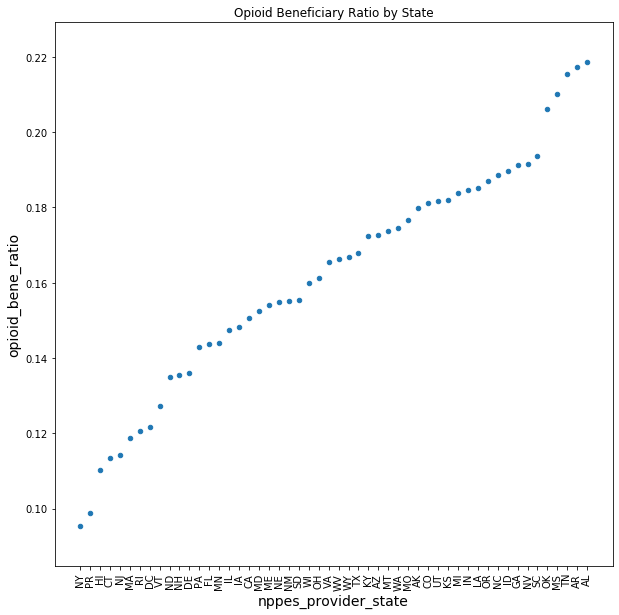

In [24]:
# Chart States by Opioid Beneficiary Ratio
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Opioid Beneficiary Ratio by State")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Opioid Beneficiary Ratio', fontsize=14)
df_filtered_state.plot.scatter(x='nppes_provider_state', y='opioid_bene_ratio',rot=90, ax=ax)

#### FINDINGS OF NOTE
* Top 5 of Alabama, Arkansas, Tennessee, Mississippi, Oklahoma all coincide with the 2017 HHS-OIG Study (although slighly different order)
* New York and Hawaii as 2 of the bottom three also coincides with the 2017 HHS-OIG Study (Puerto Rico was not listed buy may have been excluded)
* The drop off between Oklahoma (#5 - 0.206212) and South Carolina (#6 - 0.193604) appears drastic

In [25]:
# Determine total by provider specialty for all beneficiaries and those prescibed opioids
df_opioid_by_specialty = dfSummaryTables[[
    'specialty_description',
    'bene_count', 
    'opioid_bene_count'
]].groupby(['specialty_description']).sum().reset_index()

df_opioid_by_specialty.sample(10)

,specialty_description,bene_count,opioid_bene_count
115,Independent Medical Examiner,6043.0,464.0
182,Orthopedic Surgery,12742844.0,7367200.0
47,Colorectal Surgery (Proctology),280459.0,64805.0
126,Legal Medicine,42325.0,5374.0
49,Community Based Residential Treatment Facility...,89.0,0.0
211,Point of Service,410.0,114.0
114,Independent Diagnostic Testing Facility,0.0,0.0
165,"Nursing Facility, Other (Dmercs Only)",171.0,70.0
247,"Residential Treatment Facility, Mental Retarda...",22.0,0.0
80,Emergency Medicine,29243076.0,9339280.0


In [26]:
# Remove records without opioid-related beneficiaries
df_opioid_by_specialty = df_opioid_by_specialty[(df_opioid_by_specialty.opioid_bene_count != 0)].copy()
df_opioid_by_specialty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 286
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   specialty_description  175 non-null    object 
 1   bene_count             175 non-null    float64
 2   opioid_bene_count      175 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.5+ KB


In [27]:
# Determine ratio of opioid beneficiaries to total beneficiaries
df_specialty_bene_ratio = pd.DataFrame()
df_specialty_bene_ratio = df_opioid_by_specialty[['specialty_description', 'bene_count', 'opioid_bene_count']].copy()

df_specialty_bene_ratio['opioid_bene_ratio'] = (
    df_opioid_by_specialty['opioid_bene_count'] / df_opioid_by_specialty['bene_count']   # Opioid Benes / Total Benes
)

df_specialty_bene_ratio.sample(10)

,specialty_description,bene_count,opioid_bene_count,opioid_bene_ratio
9,Ambulance Service Supplier,152.0,40.0,0.263158
78,"Emergency Medical Technician, Intermediate",686.0,167.0,0.243440
43,Clinical Neuropsychologist,1267.0,33.0,0.026046
21,Behavioral Analyst,974.0,59.0,0.060575
258,Social Worker,1353.0,19.0,0.014043
36,Clinic or Group Practice,24386.0,5297.0,0.217215
201,Phlebology,794.0,131.0,0.164987
237,Registered Dietician/Nutrition Professional,2020.0,43.0,0.021287
134,Marriage & Family Therapist,2089.0,90.0,0.043083
252,Rheumatology,6669441.0,1471995.0,0.220707


In [28]:
# Sort dataframe by beneficiary ratio
df_specialty_bene_ratio.sort_values(['opioid_bene_ratio'], ascending=True, inplace=True)
df_specialty_bene_ratio.tail(25)

,specialty_description,bene_count,opioid_bene_count,opioid_bene_ratio
279,Thoracic Surgery,403194.0,169256.0,0.419788
46,Colon & Rectal Surgery,6921.0,2969.0,0.428984
32,Certified Registered Nurse Anesthetist (CRNA),12328.0,5392.0,0.437378
154,Neurological Surgery,40435.0,19125.0,0.472981
208,Plastic Surgery,63980.0,30860.0,0.482338
273,Surgical Oncology,156554.0,75872.0,0.484638
90,General Surgery,6717412.0,3278804.0,0.488105
15,"Assistant, Podiatric",507.0,254.0,0.500986
272,Surgery,24588.0,12522.0,0.509273
209,Plastic and Reconstructive Surgery,978596.0,500583.0,0.511532


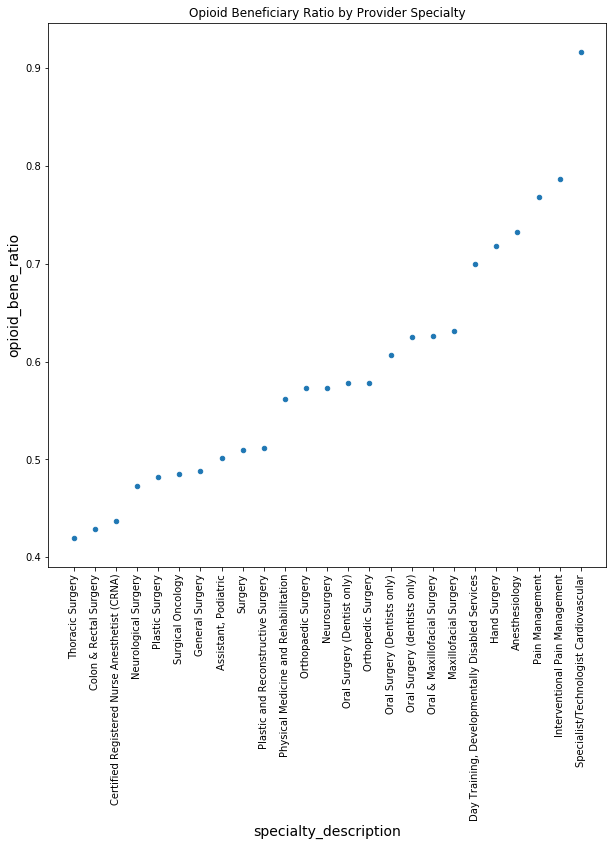

In [29]:
# Chart Top 25 Provider Specialty by Opioid Beneficiary Ratio
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title("Opioid Beneficiary Ratio by Provider Specialty")
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Opioid Beneficiary Ratio', fontsize=14)
df_specialty_bene_ratio.tail(25).plot.scatter(x='specialty_description', y='opioid_bene_ratio',rot=90, ax=ax)

#### FINDINGS OF NOTE
* Although Specialist/Technologist Cardiovascular has highest ratio it is based only on 12 beneficiaries
* Interventional Pain Management (0.786231) and Pain Management (0.768426) seem reasonable as the top 2 with large beneficiary base
* Out of ??? identified specialties which had opioid beneficiaries, the difference between Thoracic Surgery (#25 - 0.419788) and Interventional Pain Management (#2 - 0.786231) is quite high (0.366443)

### High-level Opioid-Specific Claims / Beneficiary Analysis

In [30]:
# Determine yearly sum of claims and beneficiaries along with opioid / long-acting opioid distinction
df_national = dfSummaryTables[[
    'year',
    'bene_count', 
    'total_claim_count',
    'opioid_claim_count', 
    'opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_bene_count'
]].groupby(['year']).sum().reset_index()

df_national

,year,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
0,2013,129619226.0,1367849726,78509266.0,22608352.0,9771008.0,1549374.0
1,2014,139060640.0,1413986605,79997116.0,23645982.0,9977573.0,1589393.0
2,2015,148161808.0,1447087350,78509366.0,24140647.0,10084275.0,1616302.0
3,2016,155599561.0,1480972766,77790736.0,23711529.0,9820021.0,1550531.0
4,2017,163267476.0,1494307008,74477299.0,22597870.0,9100307.0,1416843.0


In [31]:
# Determine the percent change from 2013 to each subsequent year
df_national_trends = df_national[[
    'bene_count', 
    'total_claim_count', 
    'opioid_claim_count', 
    'opioid_bene_count',
    'la_opioid_claim_count',
    'la_opioid_bene_count']
].pct_change()

df_national_trends

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.072840,0.033729,0.018951,0.045896,0.021141,0.025829
2,0.065447,0.023410,-0.018598,0.020920,0.010694,0.016930
3,0.050200,0.023416,-0.009153,-0.017776,-0.026205,-0.040692
4,0.049280,0.009004,-0.042594,-0.046967,-0.073290,-0.086221


In [32]:
# Add year column into trends dataframe
df_national_trends['year'] = df_national['year']
df_national_trends

,bene_count,total_claim_count,opioid_claim_count,opioid_bene_count,la_opioid_claim_count,la_opioid_bene_count,year
0,NaN,NaN,NaN,NaN,NaN,NaN,2013
1,0.072840,0.033729,0.018951,0.045896,0.021141,0.025829,2014
2,0.065447,0.023410,-0.018598,0.020920,0.010694,0.016930,2015
3,0.050200,0.023416,-0.009153,-0.017776,-0.026205,-0.040692,2016
4,0.049280,0.009004,-0.042594,-0.046967,-0.073290,-0.086221,2017


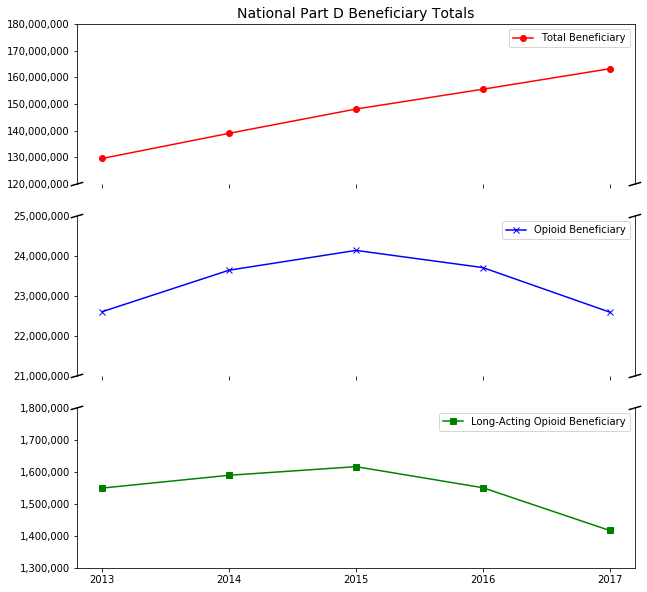

In [33]:
# Plot National Part D Beneficiary Totals
# based on example found here: https://matplotlib.org/xkcd/examples/pylab_examples/broken_axis.html

fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

# plot the same data on all axes
ax.plot(df_national['year'], df_national['bene_count'], color='red', marker='o', label='Total Beneficiary')
ax2.plot(df_national['year'], df_national['opioid_bene_count'], color='blue', marker='x', label='Opioid Beneficiary')
ax3.plot(df_national['year'], df_national['la_opioid_bene_count'], color='green', marker='s', label='Long-Acting Opioid Beneficiary')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(120000000,180000000) # total benes (120M-180M)
ax2.set_ylim(21000000,25000000) # opioid benes (21M-25M)
ax3.set_ylim(1300000,1800000) # long-acting opioid benes (1.3M-1.8M)

# hide the spines between all axes 
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Format y-axis to display millions cleanly
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create break-marks for each range of charted totals
d = .010 # how big to make the diagonal lines in axes coordinates

# Set location to place break-marks for each axes
# bene_total bottom
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# opioid bene total top
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

# opioid bene total bottom
ax2.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax2.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# long-acting opioid bene total top
kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax3.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

ax.set_title('National Part D Beneficiary Totals', fontsize=14)
ax.legend()
ax2.legend()
ax3.legend()

plt.show()

#### FINDINGS OF NOTE
* Total beneficiaries experienced a fairly steady climb throughout the timeframe
* Beneficiaries receiving opioids rose until a peak in 2015 and then declined
* Beneficiaires receiving long-active opioids was fairly flat until 2015 and then declined

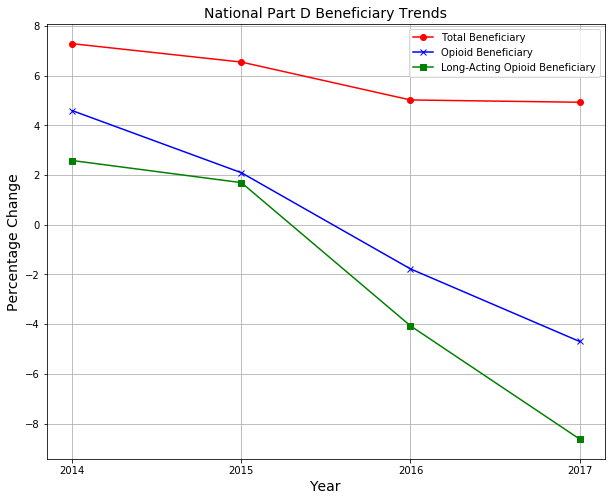

In [34]:
# Plot National Part D Beneficiary Trends
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_national_trends['year'], (df_national_trends['bene_count']*100), color='red', marker='o', label='Total Beneficiary')
ax.plot(df_national_trends['year'], (df_national_trends['opioid_bene_count']*100), color='blue', marker='x', label='Opioid Beneficiary')
ax.plot(df_national_trends['year'], (df_national_trends['la_opioid_bene_count']*100), color='green', marker='s', label='Long-Acting Opioid Beneficiary')
ax.set_title('National Part D Beneficiary Trends', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change', fontsize=14)
ax.grid(True)
ax.legend()

#### FINDINGS OF NOTE
* Rate at which total beneficiaries rose slowed slightly from 2013 to 2017
* Rate at which beneficiaries received opioids declined steadily from 2013 to 2017
* Rate at which beneficiaries received long-acting opioids slowed from 2013 to 2015 and then drastically declined from 2015 to 2017

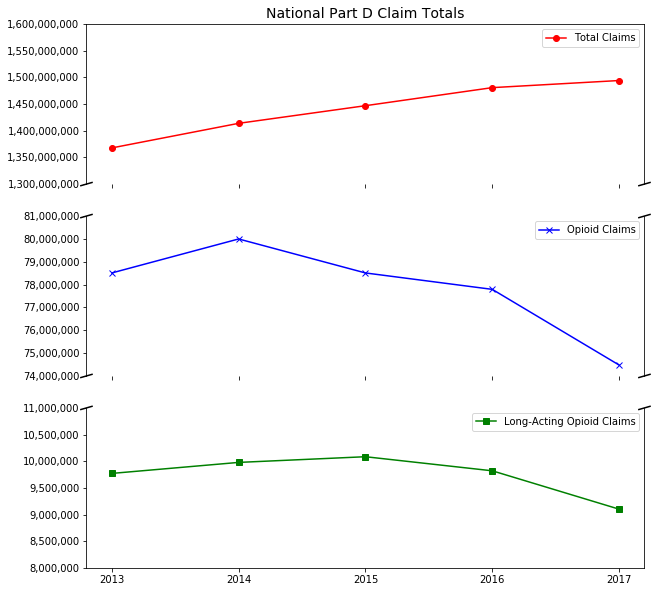

In [35]:
# Plot National Part D Claim Totals
# based on example found here: https://matplotlib.org/xkcd/examples/pylab_examples/broken_axis.html

fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(10,10))

# plot the same data on all axes
ax.plot(df_national['year'], df_national['total_claim_count'], color='red', marker='o', label='Total Claims')
ax2.plot(df_national['year'], df_national['opioid_claim_count'], color='blue', marker='x', label='Opioid Claims')
ax3.plot(df_national['year'], df_national['la_opioid_claim_count'], color='green', marker='s', label='Long-Acting Opioid Claims')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1300000000,1600000000) # total benes (1.3B-1.6B)
ax2.set_ylim(74000000,81000000) # opioid benes (74M-81M)
ax3.set_ylim(8000000,11000000) # long-acting opioid benes (8M-11M)

# hide the spines between all axes 
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

# Format y-axis to display millions cleanly
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Create break-marks for each range of charted totals
d = .010 # how big to make the diagonal lines in axes coordinates

# Set location to place break-marks for each axes
# bene_total bottom
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# opioid bene total top
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

# opioid bene total bottom
ax2.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax2.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

# long-acting opioid bene total top
kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax3.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

ax.set_title('National Part D Claim Totals', fontsize=14)
ax.legend()
ax2.legend()
ax3.legend()

plt.show()

#### FINDINGS OF NOTE
* Total claims experienced a fairly steady climb throughout the timeframe (similar to beneficiary totals)
* Claims including opioids rose until 2014 and then slowly declined (peaked 1 year earlier than beneficiary totals)
* Claims including long-active opioids was fairly flat until 2015 and then declined (similar to beneficiary totals)

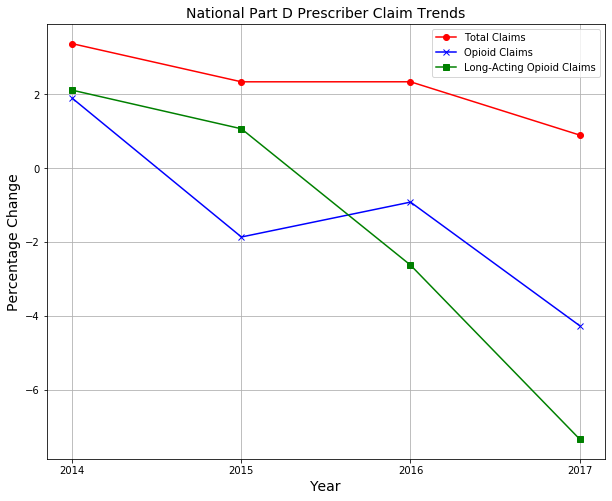

In [36]:
# Plot National Part D Claim Trends
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_national_trends['year'], (df_national_trends['total_claim_count']*100), color='red', marker='o', label='Total Claims')
ax.plot(df_national_trends['year'], (df_national_trends['opioid_claim_count']*100), color='blue', marker='x', label='Opioid Claims')
ax.plot(df_national_trends['year'], (df_national_trends['la_opioid_claim_count']*100), color='green', marker='s', label='Long-Acting Opioid Claims')
ax.set_title('National Part D Prescriber Claim Trends', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage Change', fontsize=14)
ax.grid(True)
ax.legend()

#### FINDINGS OF NOTE
* Rate at which total claims rose followed a similar pattern as beneficiary totals but at lower percentages
* Rate at which opioid-related claims changed did not follow a similar pattern as the beneficiary totals, with a dip 2015, followed by an increase in 2016 and then a sharp decline
* Rate at which long-acting opioid-related claims changed followed a similar pattern as beneficiary totals but at slightly lower rates

### Histogram of Prescriber Rate (Opioid and Long-Acting Opioid)

In [37]:
# Create dataframe with prescriber rates by provider and year
df_by_provider_rate = dfSummaryTables[[
    'npi',
    'year',
    'opioid_prescriber_rate', 
    'la_opioid_prescriber_rate'  
]]

df_by_provider_rate.sample(10)

,npi,year,opioid_prescriber_rate,la_opioid_prescriber_rate
644437,1558412239,2017,NaN,0.0
127837,1114900180,2015,3.38,NaN
964005,1912977042,2013,3.38,0.0
308309,1275557126,2016,1.96,0.0
532919,1477516524,2016,5.39,NaN
181771,1174574479,2013,31.58,NaN
117232,1104263862,2016,0.00,NaN
126486,1104942986,2017,0.00,NaN
343638,1326205824,2013,NaN,0.0
173065,1164529046,2013,23.18,0.0


In [38]:
# Describe charateristic of dataframe values
df_by_provider_rate.describe()

,npi,opioid_prescriber_rate,la_opioid_prescriber_rate
count,5.518978e+06,3.919623e+06,3.293088e+06
mean,1.499799e+09,1.135850e+01,3.507559e+00
std,2.879224e+08,1.752549e+01,9.357896e+00
min,1.003000e+09,0.000000e+00,0.000000e+00
25%,1.245678e+09,0.000000e+00,0.000000e+00
50%,1.497973e+09,3.330000e+00,0.000000e+00
75%,1.740703e+09,1.504000e+01,0.000000e+00
max,1.993000e+09,1.000000e+02,1.000000e+02


In [39]:
# Create dataframe of providers whom have prescibed opioids
df_opioid_rate = df_by_provider_rate[df_by_provider_rate.opioid_prescriber_rate != 0] 
df_opioid_rate.describe()

,npi,opioid_prescriber_rate,la_opioid_prescriber_rate
count,4.088550e+06,2.489195e+06,3.293088e+06
mean,1.499763e+09,1.788571e+01,3.507559e+00
std,2.878888e+08,1.915463e+01,9.357896e+00
min,1.003000e+09,2.000000e-02,0.000000e+00
25%,1.245672e+09,3.820000e+00,0.000000e+00
50%,1.497971e+09,9.060000e+00,0.000000e+00
75%,1.740705e+09,2.704000e+01,0.000000e+00
max,1.993000e+09,1.000000e+02,1.000000e+02


Text(0, 0.5, 'Number of Providers')

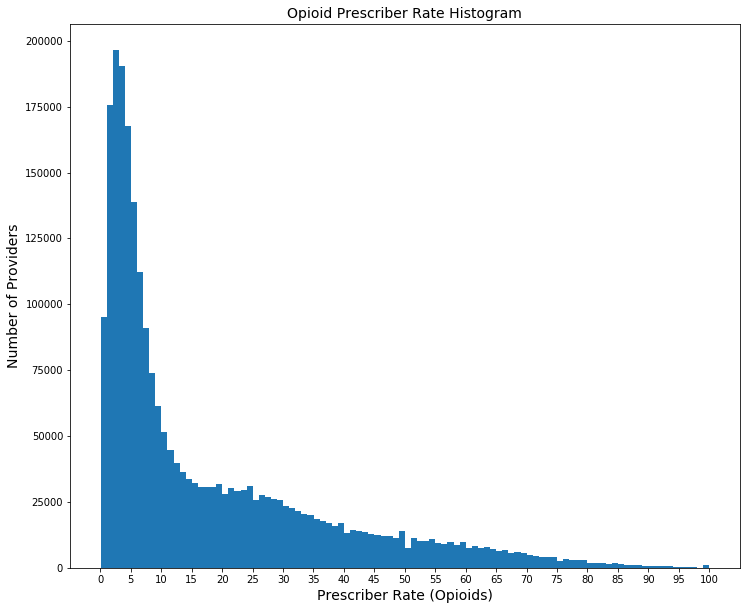

In [41]:
# Histogram of prescriber rate for providers which had opioid claims
fig, ax = plt.subplots(figsize=(12,10))
ax.hist(df_opioid_rate['opioid_prescriber_rate'], bins=100)
ax.set_xticks(range(0,101,5))
ax.set_title('Opioid Prescriber Rate Histogram', fontsize=14)
ax.set_xlabel('Prescriber Rate (Opioids)', fontsize=14)
ax.set_ylabel('Number of Providers', fontsize=14)

#### FINDINGS OF NOTE
* Provider prescriber rate for opioids has highest totals around 5% and then drops off sharply until around 15% before a steady decline

In [42]:
# Create dataframe of providers whom have prescibed long-acting opioids
df_long_acting_opioid_rate = df_by_provider_rate[df_by_provider_rate.la_opioid_prescriber_rate != 0] 
df_long_acting_opioid_rate.describe()

,npi,opioid_prescriber_rate,la_opioid_prescriber_rate
count,2.807494e+06,2.656559e+06,581604.000000
mean,1.499865e+09,6.791112e+00,19.860077
std,2.879335e+08,1.435450e+01,13.079272
min,1.003000e+09,0.000000e+00,0.260000
25%,1.245750e+09,0.000000e+00,10.130000
50%,1.497984e+09,0.000000e+00,17.070000
75%,1.740736e+09,6.080000e+00,26.830000
max,1.993000e+09,1.000000e+02,100.000000


Text(0, 0.5, 'Number of Providers')

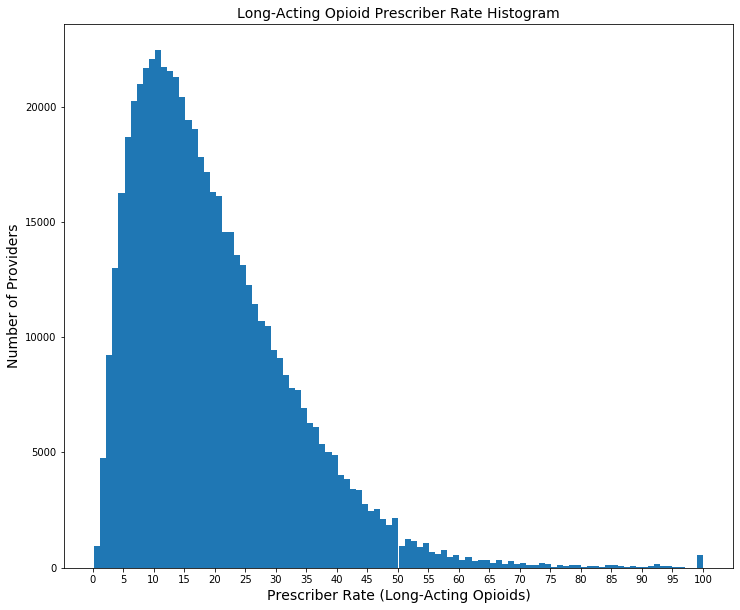

In [44]:
# Histogram of prescriber rate for providers which had long-acting opioid claims
fig, ax = plt.subplots(figsize=(12,10))
ax.hist(df_long_acting_opioid_rate['la_opioid_prescriber_rate'], bins=100)
ax.set_xticks(range(0,101,5))
ax.set_title('Long-Acting Opioid Prescriber Rate Histogram', fontsize=14)
ax.set_xlabel('Prescriber Rate (Long-Acting Opioids)', fontsize=14)
ax.set_ylabel('Number of Providers', fontsize=14)

#### FINDINGS OF NOTE
* Provider prescriber rate for long-acting opiods has highest totals around 10% and then slowly drops off until around 50% before a steady decline

## Prescriber Cost analysis (Opioid and Long-Acting Opioid)

In [45]:
# Create dataframe of provider opioid costs and claims
df_by_provider_costs = dfSummaryTables[[
    'npi',
    'year',
    'opioid_drug_cost', 
    'opioid_claim_count',
    'la_opioid_drug_cost', 
    'la_opioid_claim_count'
]]

df_by_provider_costs.sample(10)

,npi,year,opioid_drug_cost,opioid_claim_count,la_opioid_drug_cost,la_opioid_claim_count
185553,1164529806,2016,4006.64,99.0,2826.03,26.0
969354,1902800899,2014,66226.62,1383.0,16928.92,127.0
58852,1053319897,2017,5168.84,283.0,NaN,NaN
830982,1790703221,2013,NaN,NaN,0.00,0.0
323148,1295701860,2015,448.95,42.0,NaN,NaN
525341,1487933446,2014,NaN,NaN,NaN,NaN
69363,1063590487,2013,NaN,NaN,0.00,0.0
872638,1770534257,2016,687.37,112.0,0.00,0.0
285569,1255359659,2016,0.00,0.0,0.00,0.0
502622,1447314331,2016,0.00,0.0,0.00,0.0


In [46]:
df_by_provider_costs.describe()

,npi,opioid_drug_cost,opioid_claim_count,la_opioid_drug_cost,la_opioid_claim_count
count,5.518978e+06,3.919623e+06,3.919623e+06,4.723516e+06,4.723516e+06
mean,1.499799e+09,4.836484e+03,9.931664e+01,2.004491e+03,1.032138e+01
std,2.879224e+08,3.146422e+04,3.093827e+02,1.723417e+04,7.161349e+01
min,1.003000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245678e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.497973e+09,1.918800e+02,2.000000e+01,0.000000e+00,0.000000e+00
75%,1.740703e+09,1.293290e+03,7.400000e+01,0.000000e+00,0.000000e+00
max,1.993000e+09,8.504571e+06,2.642100e+04,2.572731e+06,8.444000e+03


In [47]:
df_by_provider_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   npi                    int64  
 1   year                   object 
 2   opioid_drug_cost       float64
 3   opioid_claim_count     float64
 4   la_opioid_drug_cost    float64
 5   la_opioid_claim_count  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 294.7+ MB


In [48]:
# Create dataframe with opioid cost and claim count sums by provider
df_opioid_cost = df_by_provider_costs[[
    'npi',
    'opioid_drug_cost', 
    'opioid_claim_count'
]].groupby(['npi']).sum().reset_index()

df_opioid_cost.describe()

,npi,opioid_drug_cost,opioid_claim_count
count,1.404428e+06,1.404428e+06,1.404428e+06
mean,1.499875e+09,1.349816e+04,2.771832e+02
std,2.878994e+08,1.066236e+05,1.110735e+03
min,1.003000e+09,0.000000e+00,0.000000e+00
25%,1.245769e+09,0.000000e+00,0.000000e+00
50%,1.497986e+09,4.031000e+01,1.100000e+01
75%,1.740734e+09,1.907425e+03,1.440000e+02
max,1.993000e+09,1.793724e+07,9.930700e+04


In [49]:
# Add column with calculated average opioid cost
df_opioid_avg_cost = pd.DataFrame()
df_opioid_avg_cost = df_opioid_cost[['npi', 'opioid_drug_cost', 'opioid_claim_count']].copy()

df_opioid_avg_cost['avg_cost'] = (
    df_opioid_cost['opioid_drug_cost'] / df_opioid_cost['opioid_claim_count']   # Drug Cost / # of Claims
)

df_opioid_avg_cost.sample(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
153705,1104981240,0.00,0.0,NaN
479926,1346233533,0.00,0.0,NaN
313040,1225089436,22062.17,1178.0,18.728497
895315,1639421084,398.87,94.0,4.243298
496920,1356401871,0.00,0.0,NaN
1142501,1811196397,0.00,0.0,NaN
242911,1174580500,2701.65,166.0,16.275000
440261,1316159635,879.73,71.0,12.390563
786885,1558871095,0.00,0.0,NaN
1307703,1932147410,22023.72,784.0,28.091480


In [50]:
# Remove providers with no opioid-related claims
df_opioid_avg_cost = df_opioid_avg_cost[(df_opioid_avg_cost.opioid_drug_cost != 0) & (df_opioid_avg_cost.opioid_claim_count != 0)] 
df_opioid_avg_cost.describe()

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
count,7.044630e+05,7.044630e+05,704463.000000,704463.000000
mean,1.499829e+09,2.691013e+04,552.596493,25.807184
std,2.878782e+08,1.493442e+05,1519.011957,43.234019
min,1.003000e+09,9.850000e+00,11.000000,0.434613
25%,1.245699e+09,5.094100e+02,46.000000,7.526267
50%,1.497984e+09,1.891520e+03,143.000000,14.486512
75%,1.740699e+09,1.040007e+04,450.000000,30.239096
max,1.993000e+09,1.793724e+07,99307.000000,5778.872143


In [51]:
df_opioid_avg_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704463 entries, 0 to 1404426
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   npi                 704463 non-null  int64  
 1   opioid_drug_cost    704463 non-null  float64
 2   opioid_claim_count  704463 non-null  float64
 3   avg_cost            704463 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 26.9 MB


In [52]:
# Sort dataframe and show top 50 providers based on average cost
df_opioid_avg_cost.sort_values(['avg_cost'], ascending=True, inplace=True)
df_opioid_avg_cost.tail(50).sample(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost
961583,1689671380,353078.68,247.0,1429.468340
63108,1043383987,81175.32,58.0,1399.574483
1331543,1942607486,236012.29,101.0,2336.755347
540182,1386678613,18656.34,11.0,1696.030909
27242,1013980853,2918733.10,519.0,5623.763198
495975,1356380851,324405.12,61.0,5318.116721
858778,1619067071,361823.13,75.0,4824.308400
1296078,1922091875,536221.87,317.0,1691.551640
274526,1194774695,80904.21,14.0,5778.872143
694725,1497740062,129289.82,66.0,1958.936667


In [64]:
# Merge top 50 providers by average opioid cost with provider details
df_merged_opioid_top_x = pd.merge(df_opioid_avg_cost.tail(50), df_provider_details, how="inner", on="npi")
df_merged_opioid_top_x.tail(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
40,1245394196,7547748.48,2289.0,3297.399948,STERLING,MELVYN,ORANGE,CA,92868.0,3854.0,Internal Medicine
41,1720328925,59860.38,17.0,3521.198824,KAMUDA,BRIAN,SKOKIE,IL,60077.0,1034.0,Nurse Practitioner
42,1659542702,1755276.61,495.0,3546.013354,ZAMAN,AAMIR,CLIFTON,NJ,7013.0,2468.0,Hematology/Oncology
43,1063558682,818641.36,225.0,3638.406044,BALMANOUKIAN,ANI,BALTIMORE,MD,21287.0,5.0,Hematology/Oncology
44,1154657468,2175180.57,557.0,3905.171580,AYERS,SHEILA,MEMPHIS,TN,38120.0,2146.0,Nurse Practitioner
45,1174575187,3086470.62,719.0,4292.726871,VOUDOURIS,DIALECTI,NEW YORK,NY,10028.0,880.0,Hematology/Oncology
46,1619067071,361823.13,75.0,4824.308400,OSWARI,ANDREW,CAMDEN,NJ,8102.0,1116.0,Family Practice
47,1356380851,324405.12,61.0,5318.116721,RUCKDESCHEL,JOHN,LAS VEGAS,NV,89128.0,443.0,Medical Oncology
48,1013980853,2918733.10,519.0,5623.763198,UDHRAIN,ASHISH,SKOKIE,IL,60077.0,1034.0,Hematology/Oncology
49,1194774695,80904.21,14.0,5778.872143,DAWE,GEORGE,LEWISTOWN,PA,17044.0,2115.0,Family Practice


In [65]:
df_merged_opioid_top_x.head(10)

,npi,opioid_drug_cost,opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
0,1184609398,178099.44,129.0,1380.615814,FRIEDMAN,MICHAEL,PROVIDENCE,RI,2905.0,3240.0,Psychiatry
1,1043383987,81175.32,58.0,1399.574483,RICCI,JOHN,MANASQUAN,NJ,8736.0,1500.0,Internal Medicine
2,1881699791,29466.34,21.0,1403.159048,ADLER,MITCHELL,NEW YORK,NY,10016.0,4974.0,Internal Medicine
3,1689671380,353078.68,247.0,1429.468340,ALEVIZOS,JOHN,IRVINE,CA,92618.0,2832.0,Family Practice
4,1922237486,211594.35,148.0,1429.691554,DAS,DEVIKA,BIRMINGHAM,AL,35249.0,1900.0,Internal Medicine
5,1124107909,7228509.02,5028.0,1437.650959,KESTEN,JEFFREY,GOLDEN,CO,80401.0,3600.0,Physical Medicine and Rehabilitation
6,1861443483,1315329.44,900.0,1461.477156,STARK-VANCE,VIRGINIA,DALLAS,TX,75230.0,NaN,Hematology/Oncology
7,1437128113,113962.32,77.0,1480.030130,NGUYEN,TAM,N LAS VEGAS,NV,89030.0,7187.0,Radiation Oncology
8,1740215284,683564.59,454.0,1505.648877,MAJOR,MALCOLM,PLANTATION,FL,33324.0,1807.0,Critical Care (Intensivists)
9,1992162457,248519.43,164.0,1515.362378,SPRINGMAN,KATHERINE,INDIANAPOLIS,IN,46237.0,8601.0,Nurse Practitioner


In [54]:
# Determine frequency of specialty description for top 50
df_merged_opioid_specailty = df_merged_opioid_top_x[[
    'specialty_description',
    'npi'
]].groupby(['specialty_description']).count().reset_index()

df_merged_opioid_specailty.rename(columns = {"npi": "provider_count"}, inplace= True)   # rename count column
df_merged_opioid_specailty.sort_values(['provider_count'], ascending=True, inplace=True)   # sort by count

df_merged_opioid_specailty

,specialty_description,provider_count
0,Critical Care (Intensivists),1
4,Medical Oncology,1
6,"Neuromusculoskeletal Medicine, Sports Medicine",1
8,Optometry,1
9,Pediatric Medicine,1
12,Psychiatry & Neurology,1
13,Psychologist,1
14,Pulmonary Disease,1
5,Neurology,2
10,Physical Medicine and Rehabilitation,2


([<matplotlib.patches.Wedge at 0x227f77087c8>,
 [Text(-0.0690695699404515, 1.0978294013681003, 'Critical Care (Intensivists)'),
  Text(-0.20611944149186284, 1.080515976669981, 'Medical Oncology'),
  Text(-0.3399186864662843, 1.0461621703115804, 'Neuromusculoskeletal Medicine, Sports Medicine'),
  Text(-0.46835721093687943, 0.9953097623169521, 'Optometry'),
  Text(-0.589409462737721, 0.9287607255021237, 'Pediatric Medicine'),
  Text(-0.7011663756300295, 0.8475645778852774, 'Psychiatry & Neurology'),
  Text(-0.8018654764158345, 0.7530018311613904, 'Psychologist'),
  Text(-0.8899186801919162, 0.6465637962687659, 'Pulmonary Disease'),
  Text(-0.995309745872914, 0.4683572458822384, 'Neurology'),
  Text(-1.0805159694331197, 0.20611947942881534, 'Physical Medicine and Rehabilitation'),
  Text(-1.0978294037931344, -0.0690695313956238, 'Psychiatry'),
  Text(-0.9953097787609891, -0.4683571759915195, 'Family Practice'),
  Text(-0.5299290983695926, -0.9639373167904597, 'Radiation Oncology'),
  Tex

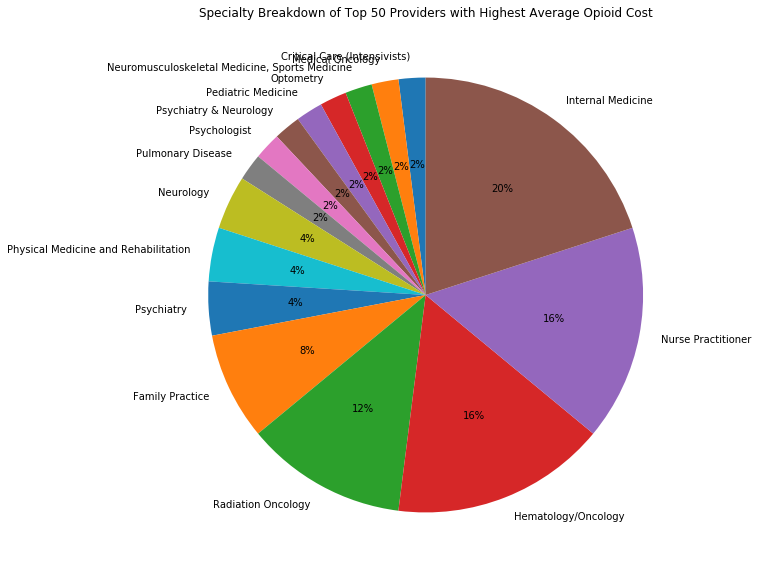

In [55]:
# Generate Provider Specialty Pie Chart Breakdown for Top 50
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
ax.set_title("Specialty Breakdown of Top 50 Providers with Highest Average Opioid Cost")
ax.pie(x=df_merged_opioid_specailty['provider_count'], labels=df_merged_opioid_specailty['specialty_description'], startangle=90, autopct='%.0f%%')

#### FINDINGS OF NOTE
* (Average Opioid Cost = Total Opioid Drug Cost / Total Opioid Claims) on a provider basis
* Of the top 50 providers with highest average opioid cost (range of 1380.62 - 5778.87) the most frequent specialties were Internal Medicine (20%), Nurse Practitioner (16%), Hematology/Oncology (16%), and Radiation Oncology (12%).

In [66]:
# Create dataframe with long-acting opioid cost and claim count sums by provider
df_la_opioid_cost = df_by_provider_costs[[
    'npi',
    'la_opioid_drug_cost', 
    'la_opioid_claim_count'
]].groupby(['npi']).sum().reset_index()

df_la_opioid_cost.describe()

,npi,la_opioid_drug_cost,la_opioid_claim_count
count,1.404428e+06,1.404428e+06,1.404428e+06
mean,1.499875e+09,6.741710e+03,3.471391e+01
std,2.878994e+08,6.505169e+04,2.733089e+02
min,1.003000e+09,0.000000e+00,0.000000e+00
25%,1.245769e+09,0.000000e+00,0.000000e+00
50%,1.497986e+09,0.000000e+00,0.000000e+00
75%,1.740734e+09,0.000000e+00,0.000000e+00
max,1.993000e+09,1.071372e+07,3.414800e+04


In [67]:
# Add column with calculated average long-acting opioid cost
df_la_opioid_avg_cost = pd.DataFrame()
df_la_opioid_avg_cost = df_la_opioid_cost[['npi', 'la_opioid_drug_cost', 'la_opioid_claim_count']].copy()

df_la_opioid_avg_cost['avg_cost'] = (
    df_la_opioid_cost['la_opioid_drug_cost'] / df_la_opioid_cost['la_opioid_claim_count']   # Drug Cost / # of Claims
)

df_la_opioid_avg_cost.sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
66148,1043514854,0.00,0.0,NaN
946765,1679597926,0.00,0.0,NaN
608831,1437199015,0.00,0.0,NaN
38832,1023347770,0.00,0.0,NaN
323869,1235117904,0.00,0.0,NaN
328333,1235220187,0.00,0.0,NaN
286710,1205287984,0.00,0.0,NaN
1115427,1790734432,0.00,0.0,NaN
1032009,1730273657,0.00,0.0,NaN
499479,1356491237,9799.15,53.0,184.889623


In [68]:
# Remove providers with no long-acting opioid-related claims
df_la_opioid_avg_cost = df_la_opioid_avg_cost[(df_la_opioid_avg_cost.la_opioid_drug_cost != 0) & (df_la_opioid_avg_cost.la_opioid_claim_count != 0)] 
df_la_opioid_avg_cost.describe()

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
count,1.829140e+05,1.829140e+05,182914.000000,182914.000000
mean,1.499431e+09,5.176337e+04,266.536099,173.703763
std,2.878424e+08,1.736697e+05,715.366126,162.719427
min,1.003000e+09,6.750000e+00,11.000000,0.250000
25%,1.245673e+09,3.649648e+03,31.000000,84.483476
50%,1.497964e+09,1.205778e+04,89.000000,130.037778
75%,1.740694e+09,3.764486e+04,233.000000,208.371867
max,1.993000e+09,1.071372e+07,34148.000000,7610.470725


In [69]:
df_la_opioid_avg_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182914 entries, 1 to 1404421
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   npi                    182914 non-null  int64  
 1   la_opioid_drug_cost    182914 non-null  float64
 2   la_opioid_claim_count  182914 non-null  float64
 3   avg_cost               182914 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 7.0 MB


In [70]:
# Sort dataframe and show top 50 providers based on average cost
df_la_opioid_avg_cost.sort_values(['avg_cost'], ascending=True, inplace=True)
df_la_opioid_avg_cost.tail(50).sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost
854687,1609926815,40731.32,11.0,3702.847273
841542,1598937880,70875.51,30.0,2362.517000
1126612,1801133343,45737.05,13.0,3518.234615
1074606,1760587034,29747.66,12.0,2478.971667
775677,1558352740,98827.78,43.0,2298.320465
279529,1194940783,126955.15,40.0,3173.878750
1380003,1982631198,46499.43,13.0,3576.879231
835924,1598757940,196620.97,75.0,2621.612933
221425,1154671857,52411.76,22.0,2382.352727
775308,1558345348,334415.98,127.0,2633.196693


In [ ]:
df_la_opioid_avg_cost.tail(50).sample(10)

In [71]:
# Merge top 50 by average long-acting opioid cost with provider details
df_merged_la_opioid_top_x = pd.merge(df_la_opioid_avg_cost.tail(50), df_provider_details, how="inner", on="npi")
df_merged_la_opioid_top_x.sample(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
49,1053309914,525122.48,69.0,7610.470725,VOGELGESANG,SCOTT,IOWA CITY,IA,52242.0,1009.0,Rheumatology
25,1922040260,1588440.37,592.0,2683.176301,JOINER,JANE,MARLBOROUGH,MA,1752.0,3235.0,Internal Medicine
5,1396780367,107477.34,47.0,2286.751915,SIMONS,RHONDA,KANSAS CITY,MO,64133.0,1713.0,Family Practice
44,1609926815,40731.32,11.0,3702.847273,VERHOEVE,PAUL,EL CAJON,CA,92021.0,4994.0,Internal Medicine
12,1760461115,354991.85,150.0,2366.612333,BONANNO,JAMES,BOSTON,MA,2116.0,5100.0,Internal Medicine
22,1558345348,334415.98,127.0,2633.196693,HARDY,RUSSELL,UKIAH,CA,95482.0,4533.0,Hematology/Oncology
20,1528036738,33518.97,13.0,2578.382308,HOANG,HIEU,TACOMA,WA,98431.0,1.0,Preventive Medicine
36,1194940783,126955.15,40.0,3173.878750,CHRISTIAN,BETH,COLUMBUS,OH,43210.0,1280.0,Hematology/Oncology
28,1063406163,800681.39,295.0,2714.174203,KOSTER,DAVID,FRESNO,CA,93720.0,3347.0,Hematology/Oncology
0,1700846185,38065.07,17.0,2239.121765,KRISHNAN,RAJMANI,SMITHTOWN,NY,11787.0,4280.0,Anesthesiology


In [72]:
df_merged_la_opioid_top_x.tail(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
40,1700827375,104380.88,30.0,3479.362667,GRAFF,KERRY,CANANDAIGUA,NY,14424.0,2242.0,Family Practice
41,1801133343,45737.05,13.0,3518.234615,VOORHIS,STEPHANIE,CONWAY,MO,65632.0,8322.0,Nurse Practitioner
42,1982631198,46499.43,13.0,3576.879231,CREECH,CHARLOTTE,SUFFERN,NY,10901.0,4164.0,Family Practice
43,1053441121,223702.74,62.0,3608.108710,BRUNING,KARLA,LIVINGSTON,TX,77351.0,8413.0,Family Practice
44,1609926815,40731.32,11.0,3702.847273,VERHOEVE,PAUL,EL CAJON,CA,92021.0,4994.0,Internal Medicine
45,1740270313,385445.84,95.0,4057.324632,SANDLER,JEFFREY,SAN DIEGO,CA,92103.0,2116.0,Internal Medicine
46,1598838393,184634.92,44.0,4196.248182,SCHREIBER,ZWI,BRONX,NY,10457.0,NaN,Hematology
47,1609861574,259912.70,39.0,6664.428205,MCKEE,CHARLES,APPLETON,WI,54913.0,NaN,Family Practice
48,1386758704,161412.47,24.0,6725.519583,YUNG,DAVID,SCARSDALE,NY,10583.0,4523.0,Internal Medicine
49,1053309914,525122.48,69.0,7610.470725,VOGELGESANG,SCOTT,IOWA CITY,IA,52242.0,1009.0,Rheumatology


In [73]:
df_merged_la_opioid_top_x.head(10)

,npi,la_opioid_drug_cost,la_opioid_claim_count,avg_cost,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,specialty_description
0,1700846185,38065.07,17.0,2239.121765,KRISHNAN,RAJMANI,SMITHTOWN,NY,11787.0,4280.0,Anesthesiology
1,1649487547,178732.50,79.0,2262.436709,GIORLANDO,STEPHANIE,ALEXANDRIA,VA,22334.0,1.0,Physical Medicine and Rehabilitation
2,1871567115,27186.48,12.0,2265.540000,DHILLON,KUSHLEEN,BARTLETT,IL,60103.0,4508.0,Internal Medicine
3,1093880759,111408.48,49.0,2273.642449,SONNENBERG,FRANK,NEW BRUNSWICK,NJ,8901.0,1962.0,Internal Medicine
4,1427064153,29694.99,13.0,2284.230000,KIM,JUNGYOP,E PATCHOGUE,NY,11772.0,4870.0,Internal Medicine
5,1396780367,107477.34,47.0,2286.751915,SIMONS,RHONDA,KANSAS CITY,MO,64133.0,1713.0,Family Practice
6,1831168640,107539.93,47.0,2288.083617,COHEN,JEFFREY,MARIETTA,GA,30060.0,7241.0,Colorectal Surgery (formerly proctology)
7,1558352740,98827.78,43.0,2298.320465,FALLER,JASON,NEW YORK,NY,10019.0,3159.0,Rheumatology
8,1164524534,230691.35,100.0,2306.913500,FISHER,MICHAEL,OAK RIDGE,TN,37830.0,7762.0,Psychiatry
9,1518936426,25625.22,11.0,2329.565455,GLAESNER,EDWARD,CARY,NC,27518.0,6118.0,Nurse Practitioner


In [74]:
# Determine frequency of specialty description for top 50
df_merged_la_opioid_specailty = df_merged_la_opioid_top_x[[
    'specialty_description',
    'npi'
]].groupby(['specialty_description']).count().reset_index()

df_merged_la_opioid_specailty.rename(columns = {"npi": "provider_count"}, inplace= True)   # rename count column
df_merged_la_opioid_specailty.sort_values(['provider_count'], ascending=True, inplace=True)   # sort by count

df_merged_la_opioid_specailty

,specialty_description,provider_count
0,Anesthesiology,1
1,Colorectal Surgery (formerly proctology),1
2,Emergency Medicine,1
4,General Practice,1
5,Hematology,1
8,Neurology,1
11,Plastic and Reconstructive Surgery,1
12,Podiatry,1
13,Preventive Medicine,1
14,Psychiatry,2


([<matplotlib.patches.Wedge at 0x227fed49d88>,
 [Text(-0.0690695699404515, 1.0978294013681003, 'Anesthesiology'),
  Text(-0.20611944149186284, 1.080515976669981, 'Colorectal Surgery (formerly proctology)'),
  Text(-0.3399186864662843, 1.0461621703115804, 'Emergency Medicine'),
  Text(-0.46835721093687943, 0.9953097623169521, 'General Practice'),
  Text(-0.589409462737721, 0.9287607255021237, 'Hematology'),
  Text(-0.7011663756300295, 0.8475645778852774, 'Neurology'),
  Text(-0.8018654764158345, 0.7530018311613904, 'Plastic and Reconstructive Surgery'),
  Text(-0.8899186801919162, 0.6465637962687659, 'Podiatry'),
  Text(-0.9639373353962876, 0.5299290645257206, 'Preventive Medicine'),
  Text(-1.046162158377023, 0.3399187231970734, 'Psychiatry'),
  Text(-1.0978293989430645, 0.06906960848527927, 'Rheumatology'),
  Text(-1.0654414883829006, -0.27355883248842394, 'Hematology/Oncology'),
  Text(-0.8899187255936679, -0.6465637337786139, 'Physical Medicine and Rehabilitation'),
  Text(-0.339918

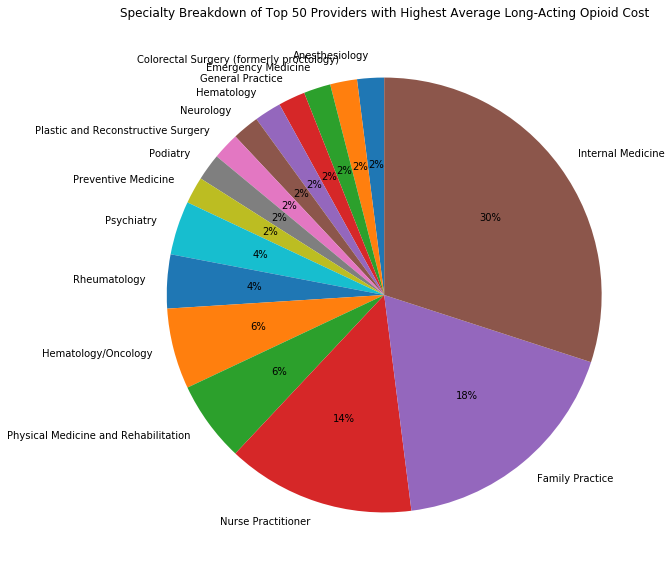

In [75]:
# Generate Provider Specialty Pie Chart Breakdown for Top 50
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('white')
ax.set_title("Specialty Breakdown of Top 50 Providers with Highest Average Long-Acting Opioid Cost")
ax.pie(x=df_merged_la_opioid_specailty['provider_count'], labels=df_merged_la_opioid_specailty['specialty_description'], startangle=90, autopct='%.0f%%')

#### FINDINGS OF NOTE
* (Average Long-Acting Opioid Cost = Total Long-Acting Opioid Drug Cost / Total Long-Acting Opioid Claims) on a provider basis
* Of the top 50 providers with highest average opioid cost (range of 2239.12 - 7610.47) the most frequent specialties were Internal Medicine (30%), Family Practice (18%), Nurse Practitioner (14%), Physical Medicine and Rehabilitation (6%), and Hematology/Oncology (6%).
* Family Practice exhibited a large increase from 8% for opioid to 18% for long-acting opioids.